<a href="https://colab.research.google.com/github/KatherineValerio/FinalProject/blob/main/finalprojectv1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


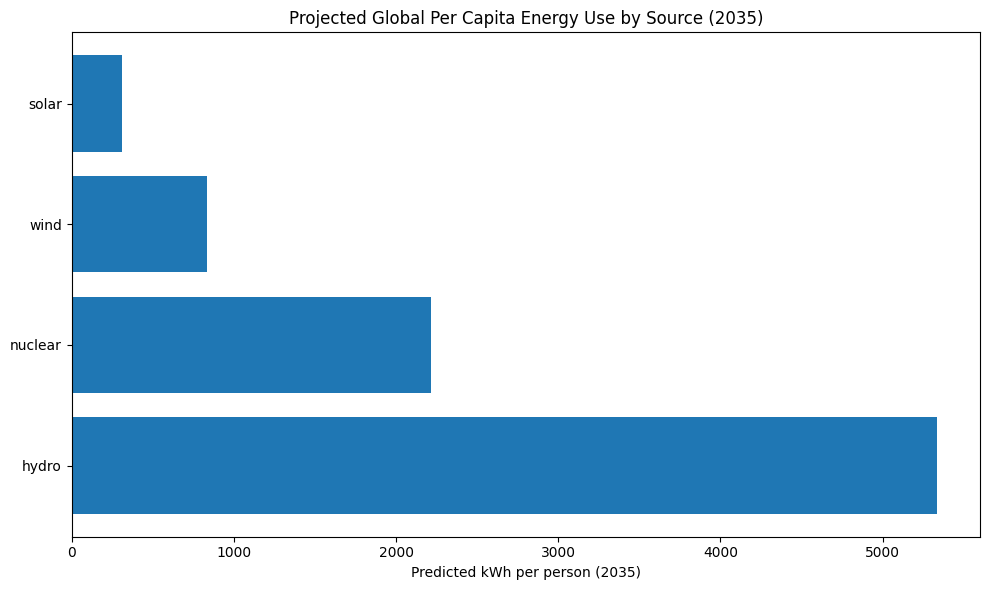

  Energy Source  Predicted kWh per capita
2         hydro               5333.206903
3       nuclear               2217.139158
1          wind                833.088584
0         solar                312.070360


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Step 1: Load datasets
df = pd.read_csv(("/content/drive/MyDrive/owid-energy-data.csv"))


global_avg = df.groupby('year')[
    ['solar_energy_per_capita', 'wind_energy_per_capita',
    'hydro_energy_per_capita','nuclear_energy_per_capita'
    ]
].mean().reset_index()

energy_cols = [
    'solar_energy_per_capita',
    'wind_energy_per_capita',
    'hydro_energy_per_capita',
    'nuclear_energy_per_capita',

]
global_avg = df.groupby('year')[energy_cols].mean().reset_index()


future_year = 2035
predictions = []

for col in energy_cols:
    sub_df = global_avg[['year', col]].dropna()
    X = sub_df[['year']]
    y = sub_df[col]

    model = LinearRegression()
    model.fit(X, y)
    prediction = model.predict([[future_year]])[0]

    predictions.append((col.replace('_energy_per_capita', ''), prediction))

# Sort predictions
pred_df = pd.DataFrame(predictions, columns=['Energy Source', 'Predicted kWh per capita'])
pred_df = pred_df.sort_values(by='Predicted kWh per capita', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(pred_df['Energy Source'], pred_df['Predicted kWh per capita'])
plt.xlabel('Predicted kWh per person (2035)')
plt.title('Projected Global Per Capita Energy Use by Source (2035)')
plt.tight_layout()
plt.show()
print(pred_df)